In [4]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from transformers import AutoModelForImageSegmentation

model = AutoModelForImageSegmentation.from_pretrained(
    'RMBG-2.0', trust_remote_code=True
)
torch.set_float32_matmul_precision(['high', 'highest'][0])
model.to('cuda')
_ = model.eval()

# Data settings
image_size = (1024, 1024)
transform_image = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

/root/miniconda3/lib/python3.12/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/root/miniconda3/lib/python3.12/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)


In [5]:
# !wget https://wx1.sinaimg.cn/mw690/006KpAl0ly1hvktugliuzj30lc0sgqu0.jpg -O image.jpg
# !wget https://wx3.sinaimg.cn/mw690/75cc5a6fly1hv4noqszfnj24iy619e88.jpg -O image2.jpg
!wget https://wx4.sinaimg.cn/mw690/75cc5a6fly1hv4no61rrij24lk64rx6u.jpg -O image2.jpg

--2024-11-14 18:01:40--  https://wx4.sinaimg.cn/mw690/75cc5a6fly1hv4no61rrij24lk64rx6u.jpg
Resolving wx4.sinaimg.cn (wx4.sinaimg.cn)... 27.221.116.244, 27.221.116.243, 27.221.116.240, ...
Connecting to wx4.sinaimg.cn (wx4.sinaimg.cn)|27.221.116.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156540 (153K) [image/jpeg]
Saving to: ‘image2.jpg’

image2.jpg          100%[===================>] 152.87K  --.-KB/s    in 0.04s   

2024-11-14 18:01:40 (3.59 MB/s) - ‘image2.jpg’ saved [156540/156540]



In [7]:
from IPython.display import display, Image as Image_display
from PIL import Image

input_image_path = "image2.jpg"
image = Image.open(input_image_path)
input_images = transform_image(image).unsqueeze(0).to('cuda')

# Prediction
with torch.no_grad():
  preds = model(input_images)[-1].sigmoid().cpu()
pred = preds[0].squeeze()
pred_pil = transforms.ToPILImage()(pred)
mask = pred_pil.resize(image.size)
image.putalpha(mask)

image.save("no_bg_image.png")


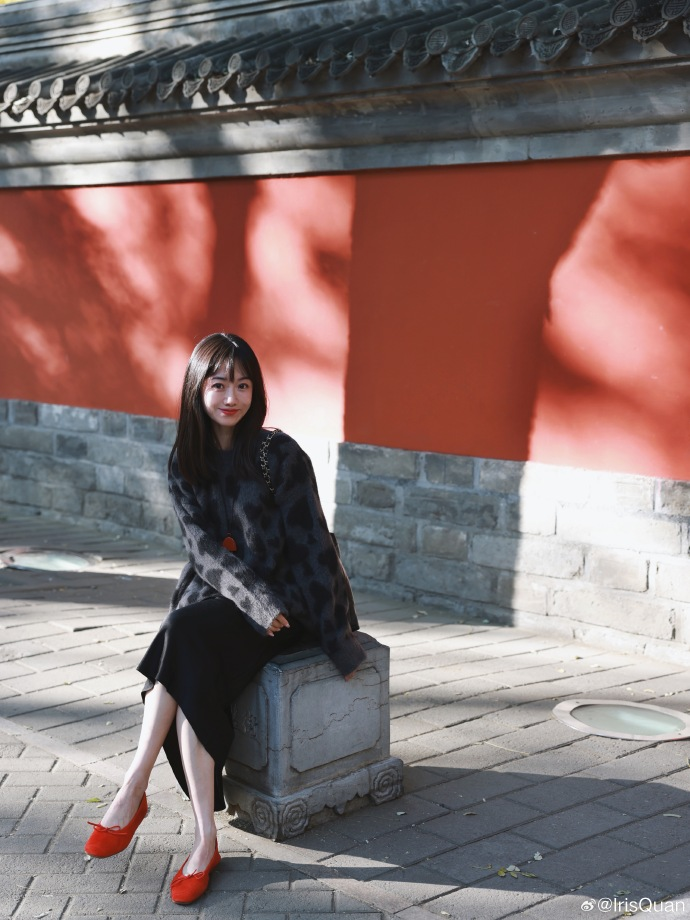
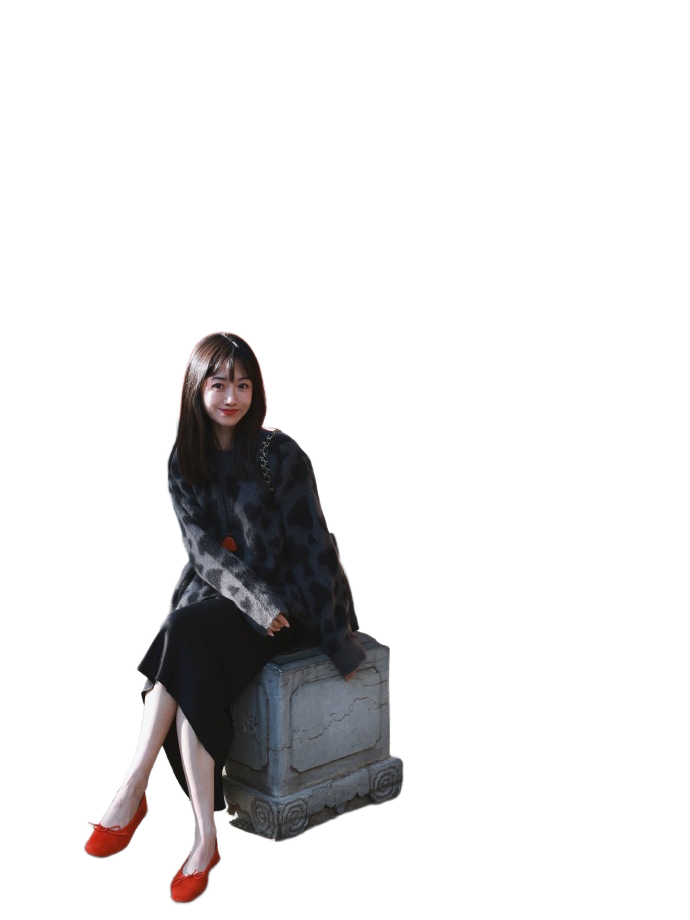

In [8]:
from IPython.display import HTML, display
from PIL import Image
import base64
from io import BytesIO

image1 = 'image2.jpg'
image2 = 'no_bg_image.png'
with open(image1, "rb") as f:
    img_str1 = base64.b64encode(f.read()).decode()
with open(image2, "rb") as f:
    img_str2 = base64.b64encode(f.read()).decode()


html_content = """
<div style="display: flex; align-items: center;">
    <div style="flex: 1; margin-right: 20px;">
        <img src="data:image/jpeg;base64,{img_str1}" width="300">
    </div>
    <div style="flex: 1; margin-right: 20px;">
        <img src="data:image/png;base64,{img_str2}" width="300">
    </div>
</div>
"""
display(HTML(html_content.format(img_str1=img_str1, img_str2=img_str2)))

In [ ]:
https://th.bing.com/th/id/OIP.aJjBsgr1oXDYaVbKuNx7vQHaLH?pid=ImgDet&w=178&h=267&c=7&dpr=1.5